In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from TM1py.Services import TM1Service
from TM1py.Utils import Utils


with TM1Service(address='localhost', port=8001, user='admin', password='apple', ssl=True) as tm1:
    # define MDX Query
    mdx = "SELECT {[plan_chart_of_accounts].[Revenue],[plan_chart_of_accounts].[COS], \
        [plan_chart_of_accounts].[Other Expenses],[plan_chart_of_accounts].[Payroll], \
        [plan_chart_of_accounts].[Travel],[plan_chart_of_accounts].[Operating Expense]} on ROWS, \
        {[plan_time].[Jan-2004],[plan_time].[Feb-2004],[plan_time].[Mar-2004]} on COLUMNS  \
    FROM [plan_BudgetPlan] \
    WHERE ([plan_version].[FY 2004 Budget],[plan_business_unit].[10110],[plan_department].[410], \
        [plan_exchange_rates].[local],[plan_source].[input]) "

    # Get data from P&L cube through MDX
    pnl_data = tm1.data.execute_mdx(mdx)
    
    # Build pandas DataFrame fram raw cellset data
    df = Utils.build_pandas_dataframe_from_cellset(pnl_data)

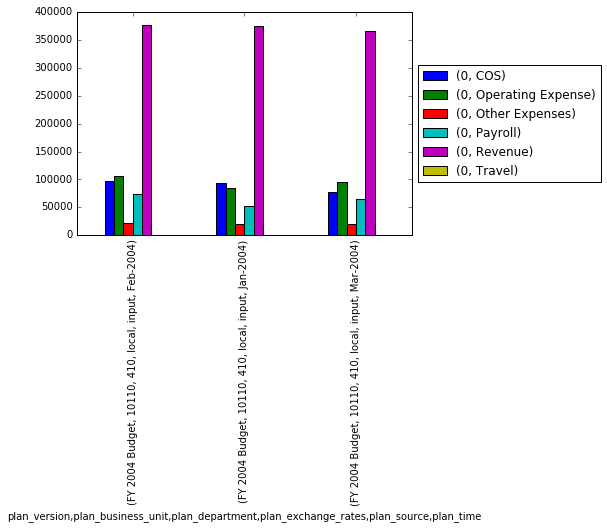

In [2]:
# Plot it
df.unstack(level=3).plot(kind='bar', legend=True,ax=plt.figure().gca())
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [3]:
# Standard Deviation
print(df.groupby(level=3).std())

                                   0
plan_chart_of_accounts              
COS                     11017.472347
Operating Expense       11153.326290
Other Expenses            655.813747
Payroll                 11298.796457
Revenue                  6073.505753
Travel                    228.355901


In [4]:
# Median
print(df.groupby(level=3).median())

                                    0
plan_chart_of_accounts               
COS                      93433.875000
Operating Expense        96266.710883
Other Expenses           20575.264447
Payroll                  64993.000000
Revenue                 374168.100000
Travel                    1336.940000
